Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Master Quantum Multi Body Clean

Reading data.
Number of atom configurations in dataset: 2475
Data read.

Filtering data.
Number of atom configurations after filtering: 2475
Number of atom configurations after limiting datasize: 2474
Data filtered.


Number of atoms: 128
Number of atoms: 128
Number of atoms: 2
Number of atoms: 2
Number of atoms: 8
Number of atoms: 8
Number of atoms: 216
Number of atoms: 216
Number of atoms: 54
Number of atoms: 54
Number of atoms: 1
Number of atoms: 1
Number of atoms: 2
Number of atoms: 2
Number of atoms: 64
Number of atoms: 64
Number of atoms: 2
Number of atoms: 2
Number of atoms: 96
Number of atoms: 96


[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

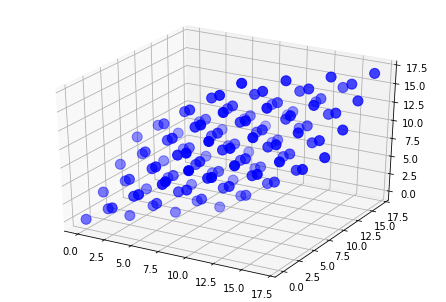

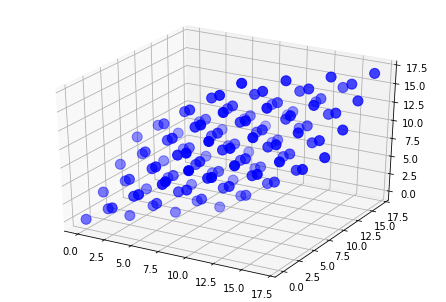

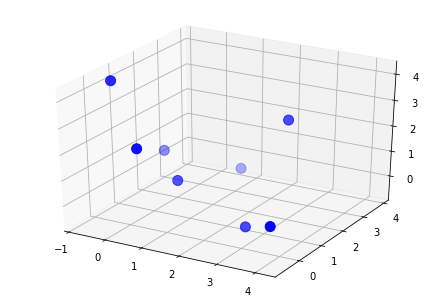

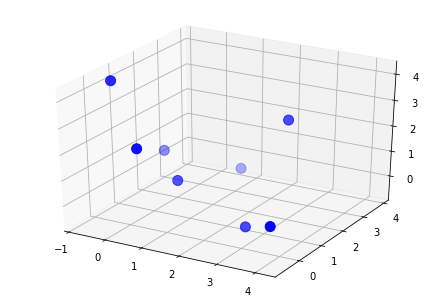

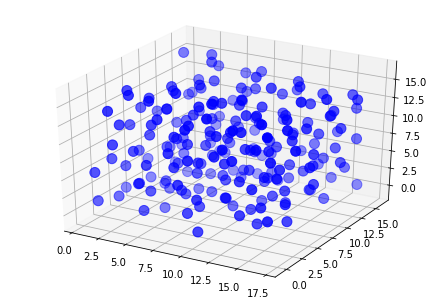

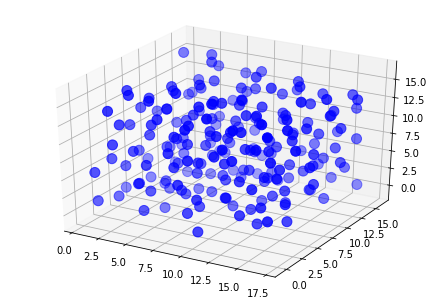

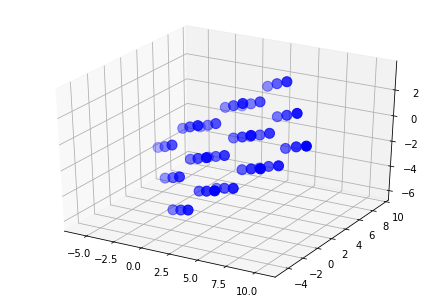

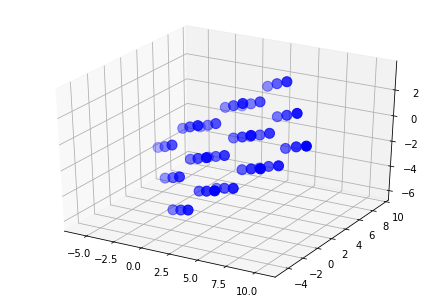

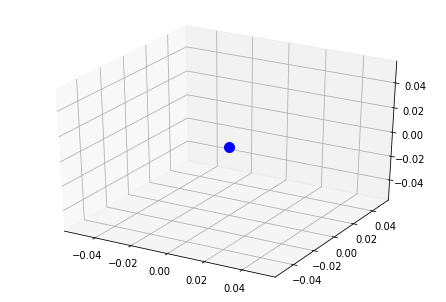

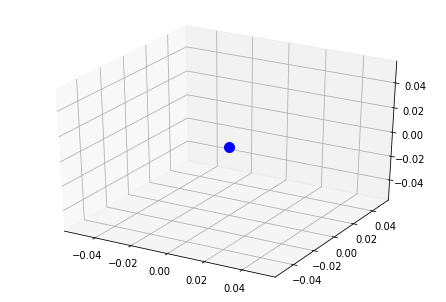

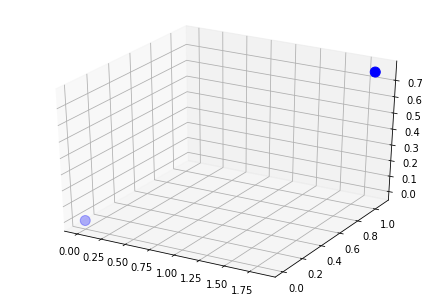

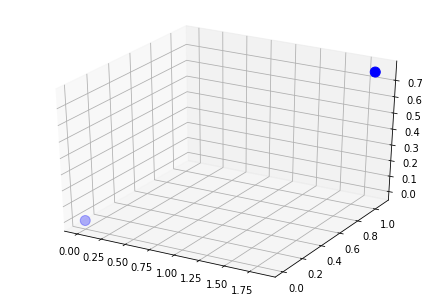

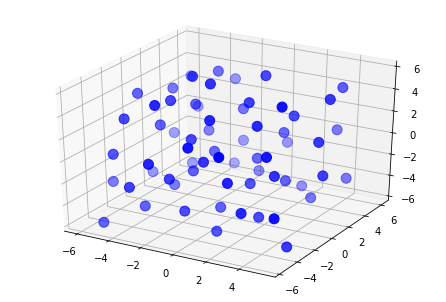

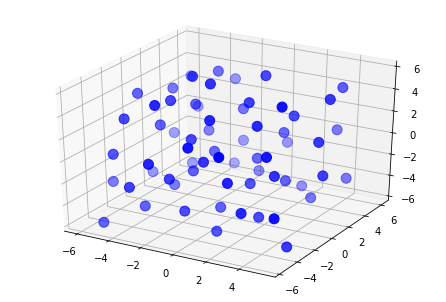

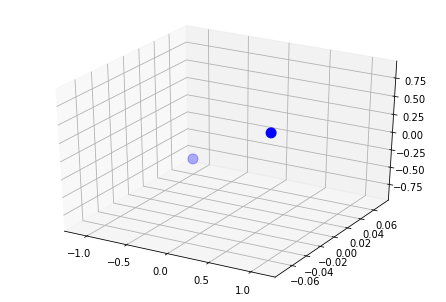

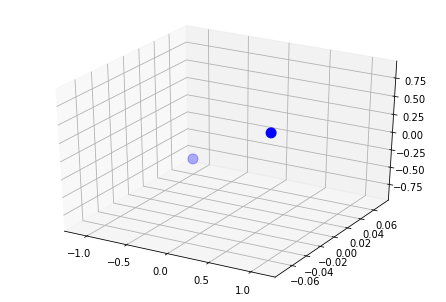

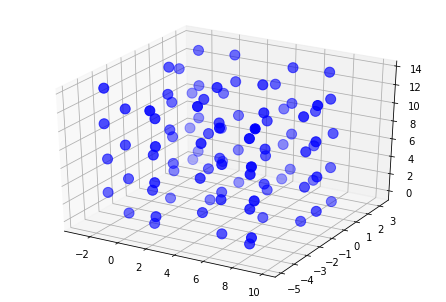

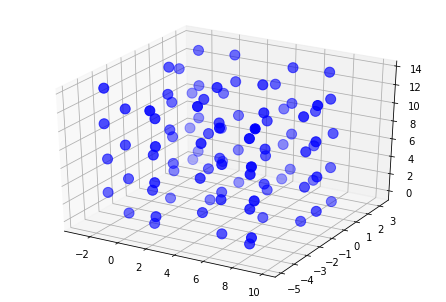

In [5]:
# Mount google drive. ---------
from google.colab import drive
drive.mount('/content/drive')
# -----------------------------

# Set working directory to correct one. ----
%cd /content/drive/My\ Drive/Colab\ Notebooks/IETP/
# ------------------------------------------

# Import own modules. -----------
%run pipeline.ipynb
# -------------------------------

# Import external modules. --------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ---------------------------------------



# Visualization parameters.
#@markdown # Visualization Parameters
#@markdown ---
dataFileName = "data_Silicon.xyz" #@param ['data_Boron.xyz', 'data_Iron.xyz', 'data_Tungsten.xyz', 'data_Silicon.xyz'] {type:"string"}
minAtoms = 1 #@param {type:"slider", min:1, max:150, step:1}
maxAtoms = 300 #@param {type:"slider", min:1, max:300, step:1}
#@markdown ---
x_data = "nAtoms" #@param ['nAtoms', 'energy', 'energyPerAtom', 'a1', 'a2', 'a3', 'volume', 'volume^1/3', 'volumePerAtom', 'volumePerAtom^1/3'] {type:"string"}
y_data_1 = "energyPerAtom" #@param ['nAtoms', 'energy', 'energyPerAtom', 'a1', 'a2', 'a3', 'volume', 'volume^1/3', 'volumePerAtom', 'volumePerAtom^1/3'] {type:"string"}
secondY = False #@param {type:"boolean"}
y_data_2 = "volumePerAtom" #@param ['nAtoms', 'energy', 'energyPerAtom', 'a1', 'a2', 'a3', 'volume', 'volume^1/3', 'volumePerAtom', 'volumePerAtom^1/3'] {type:"string"}
linestyle = ' ' #@param ['-', '--', ':', ' '] {type:"string"}


atomConfs = Pipeline.dataToAtomConfs(dataFileName)
atomConfs = Pipeline.filterAtomConfs(atomConfs, minAtoms, maxAtoms, dataSize=-1)

df = pd.DataFrame()
df['nAtoms'] = [len(ac.atoms) for ac in atomConfs]
df['energy'] = [ac.energy for ac in atomConfs]
df['energyPerAtom'] = df['energy'] / df['nAtoms']
df['a1'] = [np.linalg.norm(ac.lattice[0]) for ac in atomConfs]
df['a2'] = [np.linalg.norm(ac.lattice[1]) for ac in atomConfs]
df['a3'] = [np.linalg.norm(ac.lattice[2]) for ac in atomConfs]
df['volume'] = [np.dot(np.cross(ac.lattice[0], ac.lattice[1]), ac.lattice[2]) for ac in atomConfs]
df['volume^1/3'] = np.power(df['volume'], 1/3)
df['volumePerAtom'] = df['volume'] / df['nAtoms']
df['volumePerAtom^1/3'] = np.power(df['volumePerAtom'], 1/3)

ax1 = plt.gca()
ax1.set_xlabel(x_data)

ax1.set_ylabel(y_data_1)
ax1.plot(df[x_data], df[y_data_1], c='b', marker='x', label=y_data_1, ls=linestyle)
ax1.legend(loc='upper left')

if secondY: 
  ax2 = ax1.twinx()
  ax2.plot(df[x_data], df[y_data_2], c='y', marker='x', label=y_data_2, ls=linestyle)
  ax2.legend(loc='upper right')
  
plt.show()


[[x.visualize(), x.visualize()] for x in atomConfs[0:10]]